# MNIST Hand Written Digit Classification 
* You are given the MNIST dataset below, select two digits from the data, e.g. 0 and 5, and 
* use any two machine learning models to classify the two different images. Each method is 50 points.
* Please specify how you train your models, how you obtain your model parameters, and how you evaluate your model.
* (Bonus 20 points) Use any one method to classify any three digits (e.g. 0 vs 1 vs 2)
* (Bonus 20 points) Can you write down a digit on a paper, take a picture, and let your model tell which digit is it?
* (Bayesian bonus) If you are able to give Bayesian intpretation of your model, a total of 20 bonus points.
* Mandatory part: 100 points, bonus parts: 40 points. Perfect score: 160 points. (your score)/(100) * 15 is the total
* credit to your final grade

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
from sklearn.datasets import fetch_mldata

#Fetching the original dataset
mnist = fetch_mldata("MNIST original")

X = mnist.data / 255.0
y = mnist.target
print(X.shape) 
print(y.shape)

C:\Users\Rakesh Jain\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Rakesh Jain\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


(70000, 784)
(70000,)


In [3]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [4]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

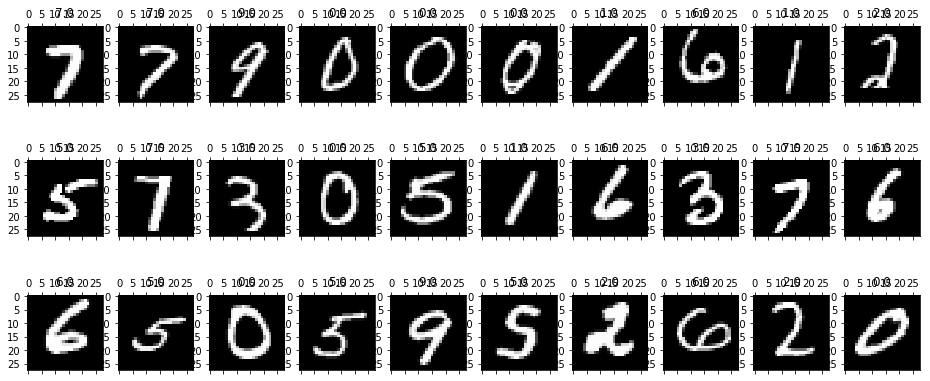

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title=str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

# Splitting Data into Training and Test Sets (MNIST)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=30, stratify=y)

In [7]:
print(X_train.shape)
print(X_test.shape)

(56000, 784)
(14000, 784)


# Showing the Images and Labels (MNIST)

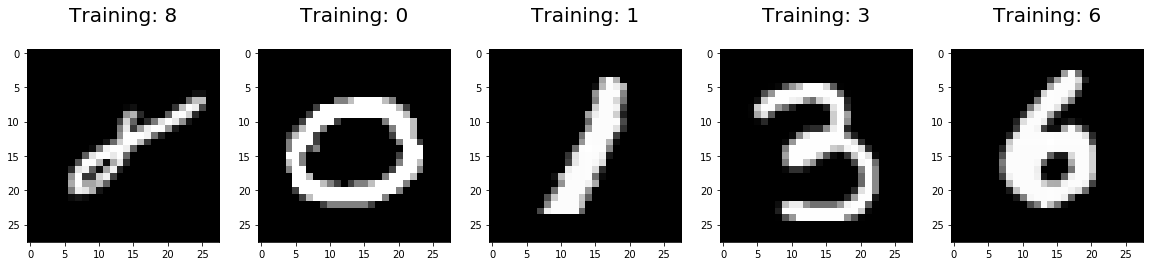

In [8]:
#Plotting the images of the training dataset
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

# Model Implementation - Logistic Regression

# Step 1. Import RandomForestClassifier

In [9]:
#Fitting the random forest on Training set
from sklearn.ensemble import RandomForestClassifier
#I have used the parameters n_estimators which is the number of trees to be used in the forest
rfc = RandomForestClassifier(n_estimators=10)
#Fitting the model on the training set 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
# Returns a NumPy Array
# Predict for One Observation (image)
b=rfc.predict(X_test[0].reshape(1,-1))

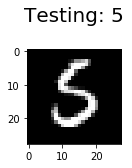

In [11]:
plt.figure(figsize=(20,4))
for index, (b, label) in enumerate(zip(X_test[0:1], y_test[0:1])):
    plt.subplot(1, 10, index + 1)
    #plt.subplot(1, 10, b)
    plt.imshow(np.reshape(b, (28,28)), cmap=plt.cm.gray)
    plt.title('Testing: %i\n' % label, fontsize = 20)

In [12]:
# Predict for Multiple Observations (images) at Once
a=rfc.predict(X_test[0:10])

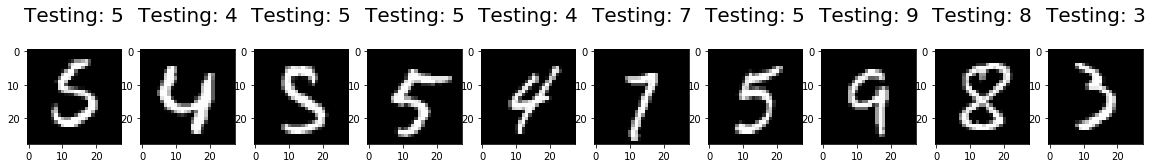

In [13]:
plt.figure(figsize=(20,4))
for index, (a, label) in enumerate(zip(X_test[0:10], y_test[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(a, (28,28)), cmap=plt.cm.gray)
    plt.title('Testing: %i\n' % label, fontsize = 20)

In [14]:
# Make predictions on entire test data
predictions = rfc.predict(X_test)

In [15]:
print(predictions)

[5. 4. 5. ... 2. 6. 7.]


In [16]:
score = rfc.score(X_test, y_test)
print(f'Test Acuuracy score is {score:.2f} ')

Test Acuuracy score is 0.95 


# Model Evaluation -  Now we will see the misclassified values by RandomForestClassifier

In [17]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

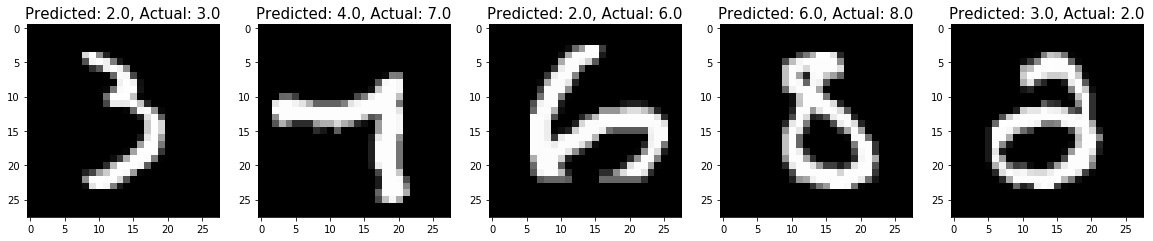

In [18]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

In [19]:
print("Total number of Missclassified values are:",len(misclassifiedIndexes))

Total number of Missclassified values are: 728


# Step 2: Importing KNN

In [20]:
#Fitting knn on Training set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [21]:
# Returns a NumPy Array
# Predict for One Observation (image)
c=knn.predict(X_test[0].reshape(1,-1))

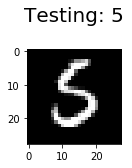

In [22]:
import numpy as np
plt.figure(figsize=(20,4))
for index_1, (c, label_1) in enumerate(zip(X_test[0:1], y_test[0:1])):
    plt.subplot(1, 10, index_1 + 1)
    plt.imshow(np.reshape(c, (28,28)), cmap=plt.cm.gray)
    plt.title('Testing: %i\n' % label_1, fontsize = 20)

In [23]:
# Predict for Multiple Observations (images) at Once
d=knn.predict(X_test[0:10])

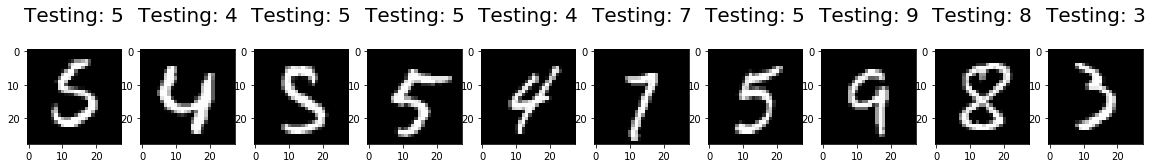

In [24]:
# Predict for Multiple Observations (images) at Once
plt.figure(figsize=(20,4))
for index_2, (d, label_2) in enumerate(zip(X_test[0:10], y_test[0:10])):
    plt.subplot(1, 10, index_2 + 1)
    plt.imshow(np.reshape(d, (28,28)), cmap=plt.cm.gray)
    plt.title('Testing: %i\n' % label_2, fontsize = 20)

In [25]:
# Make predictions on entire test data
predictions_1 = knn.predict(X_test)

In [26]:
print(predictions_1)

[5. 4. 5. ... 2. 6. 7.]


In [27]:
score = knn.score(X_test, y_test)
print(f'Test Acuuracy score is {score:.2f} ')

Test Acuuracy score is 0.97 


# Model Evaluation - Now we will see the misclassified values by KNN

In [28]:
index_2 = 0
misclassifiedIndexes_knn = []
for label_1, predict in zip(y_test, predictions_1):
    if label_1 != predict: 
        misclassifiedIndexes_knn.append(index_2)
    index_2 +=1

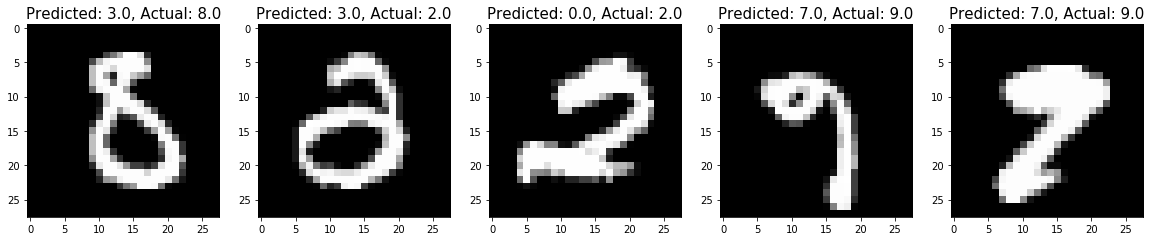

In [29]:
plt.figure(figsize=(20,4))
for plotIndex_1, badIndex_1 in enumerate(misclassifiedIndexes_knn[0:5]):
    plt.subplot(1, 5, plotIndex_1 + 1)
    plt.imshow(np.reshape(X_test[badIndex_1], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions_1[badIndex_1], y_test[badIndex_1]), fontsize = 15)

In [30]:
print("Total number of Missclassified values are:",len(misclassifiedIndexes_knn))

Total number of Missclassified values are: 364


# Step 3: Writing down a digit on a paper, take a picture, and let your model tell which digit is it

In [31]:
# Import the modules
from sklearn import datasets
from skimage.feature import hog
from sklearn.svm import LinearSVC
import numpy as np
import cv2
from collections import Counter


# Extract the features and labels
features = np.array(mnist.data, 'int16') 
labels = np.array(mnist.target, 'int')

# Extract the hog features
list_hog_fd = []
for feature in features:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualize=False)
    list_hog_fd.append(fd)
hog_features = np.array(list_hog_fd, 'float64')

print("Count of digits in dataset", Counter(labels))

# Create an linear SVM object
clf = KNeighborsClassifier(n_neighbors=3)


# Perform the training
clf.fit(hog_features, labels)

Count of digits in dataset Counter({1: 7877, 7: 7293, 3: 7141, 2: 6990, 9: 6958, 0: 6903, 6: 6876, 8: 6825, 4: 6824, 5: 6313})


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
im = cv2.imread("/Users/Rakesh Jain/Desktop/image.png")
print(im)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [33]:
# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

In [34]:
# For each rectangular region, calculate HOG features and predict
# the digit using KNN.
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
    # Make the rectangular region around the digit
    leng = int(rect[3] * 1.6)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    # Resize the image
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1), visualize=False)
    nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)

In [35]:
cv2.imshow("Resulting Image with Rectangular ROIs", im)
cv2.waitKey(0)

-1

# Step 4: Importing Multinomial Naive Bayes as Bayesian

In [36]:
#Naive Bayes becomes Bayesian when the number of inputs are high
from sklearn.naive_bayes import MultinomialNB
MNB= MultinomialNB().fit(X_train,y_train)

In [37]:
# Returns a NumPy Array
# Predict for One Observation (image)
e=MNB.predict(X_test[20].reshape(1,-1))

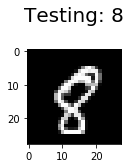

In [38]:
import numpy as np
plt.figure(figsize=(20,4))
for index_a, (e, label_a) in enumerate(zip(X_test[19:20], y_test[19:20])):
    plt.subplot(1, 10, index_a + 1)
    plt.imshow(np.reshape(e, (28,28)), cmap=plt.cm.gray)
    plt.title('Testing: %i\n' % label_a, fontsize = 20)

In [39]:
# Predict for Multiple Observations (images) at Once
f=MNB.predict(X_test[10:20])

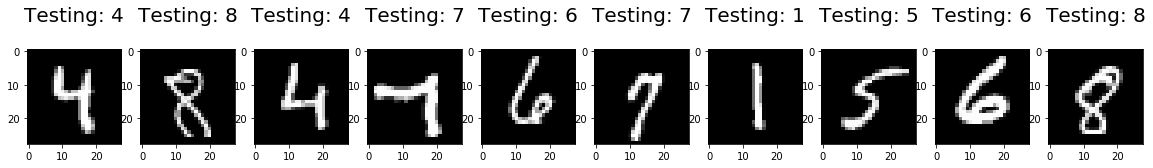

In [40]:
# Predict for Multiple Observations (images) at Once
plt.figure(figsize=(20,4))
for index_b, (f, label_b) in enumerate(zip(X_test[10:20], y_test[10:20])):
    plt.subplot(1, 10, index_b + 1)
    plt.imshow(np.reshape(f, (28,28)), cmap=plt.cm.gray)
    plt.title('Testing: %i\n' % label_b, fontsize = 20)

In [41]:
# Make predictions on entire test data
predictions_3 = MNB.predict(X_test)

In [42]:
print(predictions_3[10:20])

[4. 9. 4. 4. 6. 7. 1. 5. 6. 8.]


In [43]:
score = MNB.score(X_test, y_test)
print(f'Test Acuuracy score is {score:.2f} ')

Test Acuuracy score is 0.83 


# Model Evaluation - Now we will see the misclassified values by Naive Bayes

In [44]:
index_p = 0
misclassifiedIndexes_MNB = []
for label_b, predict in zip(y_test, predictions_3):
    if label_ b!= predict: 
        misclassifiedIndexes_MNB.append(index_p)
    index_p +=1

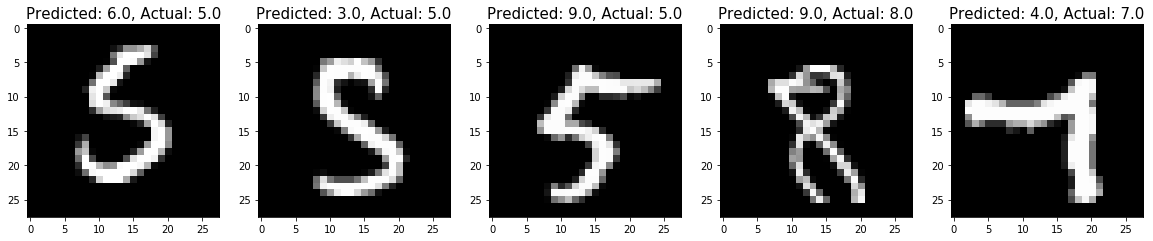

In [45]:
plt.figure(figsize=(20,4))
for plotIndex_2, badIndex_2 in enumerate(misclassifiedIndexes_MNB[0:5]):
    plt.subplot(1, 5, plotIndex_2 + 1)
    plt.imshow(np.reshape(X_test[badIndex_2], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions_3[badIndex_2], y_test[badIndex_2]), fontsize = 15)

In [46]:
print("Total number of Missclassified values are:",len(misclassifiedIndexes_MNB))

Total number of Missclassified values are: 2404
